In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



In [3]:
# lets create highly imbalanced dataset
data = pd.DataFrame({
    'feature1': np.random.randn(1000),
    'feature2': np.random.randn(1000),
    'target': np.concatenate((np.zeros(950), np.ones(50)))  #
} ) 

X = data[['feature1', 'feature2']]
y = data['target']

# letrs train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# lets train a simple KNN classifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# lets see accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')



Accuracy: 0.95


In [4]:
# copy X_test to X_test_mod
X_test_mod = X_test.copy()
X_test_mod['Actual'] = y_test.values
X_test_mod['Predicted'] = y_pred

X_test_mod

,feature1,feature2,Actual,Predicted
508,0.296244,0.751175,0.0,0.0
313,-1.441412,0.068464,0.0,0.0
953,0.219817,-1.315409,1.0,0.0
769,-0.558349,1.358965,0.0,0.0
295,0.103161,-0.625506,0.0,0.0
...,...,...,...,...
742,-0.415865,-0.376543,0.0,0.0
378,-1.057418,-1.723504,0.0,0.0
646,0.166910,0.318109,0.0,0.0
840,1.314278,-0.067788,0.0,0.0


In [5]:
X_test_mod[X_test_mod['Actual'] == 1]

,feature1,feature2,Actual,Predicted
953,0.219817,-1.315409,1.0,0.0
954,0.016942,-1.600561,1.0,0.0
968,-0.926636,-1.116924,1.0,0.0
993,0.591986,0.050273,1.0,0.0
994,-0.968540,1.684791,1.0,0.0
975,-0.180174,0.478478,1.0,0.0
957,-1.384773,-2.690510,1.0,0.0
969,-1.453689,0.050343,1.0,0.0
955,0.219126,0.494166,1.0,0.0
998,-0.291806,-0.160595,1.0,0.0


In [6]:
y_test.value_counts()

target
0.0    190
1.0     10
Name: count, dtype: int64

Confusion Matrix:


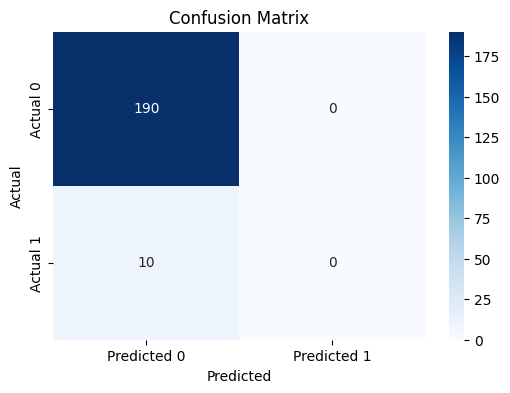

In [7]:
# Conclusion
# In imbalanced datasets, accuracy can be misleading. Here, 
# the model predicts all instances as the majority class (0), leading to high accuracy but failing to identify any minority class (1) instances.

# lets import confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show() 

In [8]:
# similarly we can calculate precision, recall and f1-score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

# very bad model for imbalanced dataset


Precision: 0.00
Recall: 0.00
F1-Score: 0.00


/Users/rahultiwari/Documents/02_Freelancing/as_ds_course/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### Reference
- https://medium.com/@abhishekjainindore24/a-comprehensive-guide-to-performance-metrics-in-machine-learning-4ae5bd8208ce
- https://scikit-learn.org/stable/modules/model_evaluation.html

ROC AUC: 0.50
accuracy: 0.95


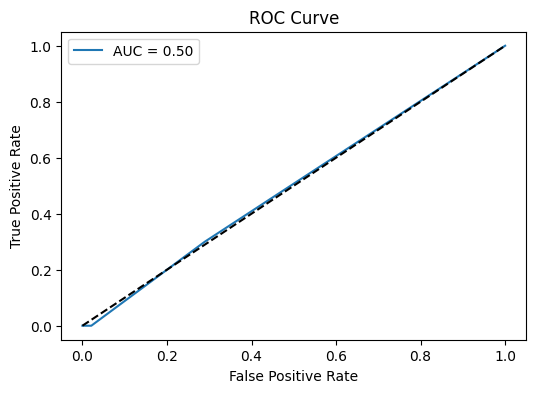

In [10]:
# lets import auc and roc_curve
from sklearn.metrics import roc_auc_score, roc_curve
y_prob = knn.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC: {auc:.2f}')
print('accuracy:', accuracy)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [15]:
# log loss
from sklearn.metrics import log_loss
logloss = log_loss(y_test, y_prob)
print(f'Log Loss: {logloss:.2f}')

# best log loss is 0.01 for perfect model
# lets reduce the log loss : hyperparameter tuning
knn_tuned = KNeighborsClassifier(n_neighbors=9, weights='distance', metric='manhattan')
knn_tuned.fit(X_train, y_train)
y_prob_tuned = knn_tuned.predict_proba(X_test)[:, 1]
logloss_tuned = log_loss(y_test, y_prob_tuned)
print(f'Tuned Log Loss: {logloss_tuned:.2f}')

Log Loss: 1.34
Tuned Log Loss: 0.84
